# Data Science Academy
### Fundamentos de Linguagem Python Para Análise de Dados e Data Science
### Análise Estatística com Statsmodels

Problema de Negócio:

> Existe alguma relação entre a área de imóveis (em metros quadrados) e o valor do aluguel em uma determinada cidade? Caso exista relação, como podemos mensurá-la?

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [21]:
df = pd.read_csv('dataset.csv')

In [22]:
df.shape

(3000, 7)

In [23]:
df.columns

Index(['valor_aluguel', 'area_m2', 'ano_construcao', 'codigo_localidade',
       'numero_banheiros', 'numero_cozinhas', 'codigo_bairro'],
      dtype='object')

In [24]:
df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


# Análise Exploratória - Resumo Estatístico

In [26]:
# Verifica se há valores ausentes
df.isnull().sum()

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

In [27]:
#Resumo estatístico do dataset - ATENÇÃO
df.describe()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


> Note que `codigo_localidade` e `codigo_bairro` são variáveis qualitativas, e não quantitativas, portanto não faz sentido utilizar o método `df.describe()` nessas colunas.

In [28]:
df['codigo_bairro'] = df['codigo_bairro'].astype(str)
df['codigo_localidade'] = df['codigo_localidade'].astype(str)

In [29]:
df.describe()

,valor_aluguel,area_m2,ano_construcao,numero_banheiros,numero_cozinhas
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,0.061333,0.042000
std,195.865692,23.675758,22.288136,0.239981,0.200623
min,40.512820,20.000000,1918.000000,0.000000,0.000000
25%,320.961530,51.000000,1939.000000,0.000000,0.000000
50%,426.897435,65.000000,1959.000000,0.000000,0.000000
75%,560.282055,81.000000,1972.000000,0.000000,0.000000
max,1843.384600,160.000000,1997.000000,1.000000,1.000000


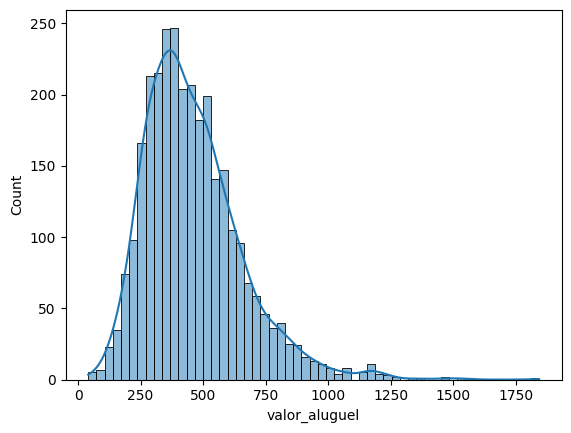

In [30]:
#Histograma da variável alvo
sns.histplot(data=df,x='valor_aluguel',kde=True)
plt.show()

In [31]:
# Correlação entre as variáveis
df.corr(numeric_only=True)

,valor_aluguel,area_m2,ano_construcao,numero_banheiros,numero_cozinhas
valor_aluguel,1.000000,0.584878,0.139194,0.250261,0.170707
area_m2,0.584878,1.000000,-0.226581,0.226306,0.045716
ano_construcao,0.139194,-0.226581,1.000000,0.065824,0.109881
numero_banheiros,0.250261,0.226306,0.065824,1.000000,0.064216
numero_cozinhas,0.170707,0.045716,0.109881,0.064216,1.000000


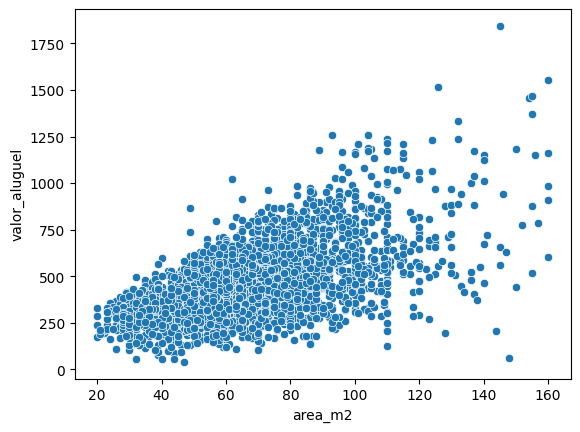

In [32]:
# Vamos analisar a relação entre a variável de entrada area_m2 e a variável alvo valor aluguel
sns.scatterplot(data=df,x='area_m2',y='valor_aluguel')
plt.show()

# Construção do Modelo OLS (Ordinary Least Squares) com Statsmodels em Python

In [33]:
df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [34]:
#Definição das variáveis
y = df['valor_aluguel'] #dependente
X = df['area_m2'] #independente

In [35]:
# O Statsmodels requer a adição de uma constante à variável independente
X = sm.add_constant(X)

In [36]:
#Criando o modelo
modelo = sm.OLS(y,X)

In [37]:
#Treinamento dp modelo
resultado = modelo.fit()

In [40]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Tue, 12 Aug 2025   Prob (F-statistic):          6.84e-275
Time:                        11:01:52   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0